In [1]:
import pandas as pd
import os
current_dir = os.getcwd()
current_dir
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")
current_dir = os.getcwd()
current_dir

You set a new current directory


'h:\\VScode\\March Group\\March_Team_Project'

In [3]:
# Issue 16 and Issue 15
# Merge weather data with pollution data, ensure pollution data is filtered for locations and timeperiod.
# Merge on date and location
# Save the merged data to a new csv file
# load pollution data
pollution_data = pd.read_csv('Source_Data//filtered_pollution.zip')
# count of records in pollution data
print(pollution_data.shape)
# load pollution filter "pollution_data_available.csv
# filter pollution data for locations and timeperiod
pollution_filter = pd.read_csv('Outputs/pollution_data_available.csv')
# count of records in pollution filter
print(pollution_filter.shape)
# filter pollution_data for location in polution_filter with date between years 2003 and 2016
pollution_data = pollution_data[pollution_data['Date Local'].str.contains('200[3-9]|201[0-6]')]
print(pollution_data.shape)
pollution_data = pollution_data[pollution_data['State'].isin(pollution_filter['State'])]
print(pollution_data.shape)
pollution_data

(158438, 30)
(29, 6)
(158438, 30)
(158438, 30)


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Year
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2003-01-01,Parts per billion,...,4.333333,10.0,0,14.0,Parts per million,2.237500,5.9,0,NaN,2003
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2003-01-01,Parts per billion,...,4.333333,10.0,0,14.0,Parts per million,2.089474,4.6,5,52.0,2003
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2003-01-01,Parts per billion,...,4.300000,8.3,2,NaN,Parts per million,2.237500,5.9,0,NaN,2003
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2003-01-01,Parts per billion,...,4.300000,8.3,2,NaN,Parts per million,2.089474,4.6,5,52.0,2003
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2003-01-02,Parts per billion,...,4.625000,10.0,6,14.0,Parts per million,1.795652,3.4,6,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158433,127305,48,453,14,3724 North Hills Dr,Texas,Travis,Austin,2013-12-30,Parts per billion,...,0.037500,0.2,23,NaN,Parts per million,0.091667,0.3,21,3.0,2013
158434,127306,48,453,14,3724 North Hills Dr,Texas,Travis,Austin,2013-12-31,Parts per billion,...,2.104167,10.1,14,14.0,Parts per million,0.200000,0.4,0,NaN,2013
158435,127307,48,453,14,3724 North Hills Dr,Texas,Travis,Austin,2013-12-31,Parts per billion,...,2.104167,10.1,14,14.0,Parts per million,0.225000,0.4,0,5.0,2013
158436,127308,48,453,14,3724 North Hills Dr,Texas,Travis,Austin,2013-12-31,Parts per billion,...,2.062500,7.3,14,NaN,Parts per million,0.200000,0.4,0,NaN,2013


In [18]:
# provide a count of records by year
pollution_data['year'] = pollution_data['Date Local'].str[:4]
pollution_data.groupby('year').size()   


year
2003    75936
2013    82502
dtype: int64

In [4]:
# create a cleaned version of pollution data where any row with a null value is removed.
pollution_data_cleaned = pollution_data.dropna()
print(pollution_data_cleaned.shape)
#format city as capitals
pollution_data_cleaned['City'] = pollution_data_cleaned['City'].str.upper()
# rename Date Local to Date
pollution_data_cleaned.rename(columns={'Date Local':'Date'}, inplace=True)
#convert Date to datetime
pollution_data_cleaned['Date'] = pd.to_datetime(pollution_data_cleaned['Date'])
pollution_data_cleaned

(39632, 30)


C:\Users\pgold\AppData\Local\Temp\ipykernel_9764\740962649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_data_cleaned['City'] = pollution_data_cleaned['City'].str.upper()
C:\Users\pgold\AppData\Local\Temp\ipykernel_9764\740962649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_data_cleaned.rename(columns={'Date Local':'Date'}, inplace=True)
C:\Users\pgold\AppData\Local\Temp\ipykernel_9764\740962649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date,NO2 Units,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Year
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-01,Parts per billion,...,4.333333,10.0,0,14.0,Parts per million,2.089474,4.6,5,52.0,2003
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-02,Parts per billion,...,4.625000,10.0,6,14.0,Parts per million,1.737500,2.6,8,30.0,2003
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-03,Parts per billion,...,4.625000,14.0,21,20.0,Parts per million,1.412500,2.9,23,33.0,2003
13,13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-04,Parts per billion,...,6.208333,13.0,1,19.0,Parts per million,2.275000,3.6,2,41.0,2003
17,17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-05,Parts per billion,...,4.458333,8.0,0,11.0,Parts per million,1.612500,3.1,0,35.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158419,127291,48,453,14,3724 North Hills Dr,Texas,Travis,AUSTIN,2013-12-27,Parts per billion,...,0.583333,2.4,17,3.0,Parts per million,0.208333,0.3,0,3.0,2013
158423,127295,48,453,14,3724 North Hills Dr,Texas,Travis,AUSTIN,2013-12-28,Parts per billion,...,0.604348,1.8,21,1.0,Parts per million,0.225000,0.3,0,3.0,2013
158427,127299,48,453,14,3724 North Hills Dr,Texas,Travis,AUSTIN,2013-12-29,Parts per billion,...,0.063636,0.4,9,0.0,Parts per million,0.145833,0.2,0,2.0,2013
158431,127303,48,453,14,3724 North Hills Dr,Texas,Travis,AUSTIN,2013-12-30,Parts per billion,...,0.045833,0.3,21,0.0,Parts per million,0.091667,0.3,21,3.0,2013


In [6]:
# load weather data on day and city
weather_data = pd.read_csv('Outputs/Us_Weather_Final_10km_V2.zip')
# rename columns to match stations
weather_data = weather_data.rename(columns={'Station_ID':'StationId'})
# convert date to datetime current format yyyymmdd
weather_data['Date'] = weather_data['Date'].astype(str)
weather_data['Date'] = weather_data['Date'].apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
# drop columns not needed
weather_data = weather_data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
print(weather_data.shape)
weather_data

(384067, 23)


,StationId,Date,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,TSUN,WDMV,...,WT04,WT05,WT06,WT08,WT09,WT11,WT13,WT16,WT18,WT22
0,USC00010764,2003-01-01,NaN,NaN,36.0,NaN,144.0,39.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00010764,2003-01-02,NaN,NaN,30.0,NaN,106.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00010764,2003-01-03,NaN,NaN,0.0,NaN,39.0,-11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00010764,2003-01-04,NaN,NaN,0.0,NaN,111.0,-44.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00010764,2003-01-05,NaN,NaN,0.0,NaN,167.0,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384062,USW00094789,2013-12-27,49.0,NaN,0.0,21.0,56.0,-5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384063,USW00094789,2013-12-28,54.0,NaN,0.0,48.0,117.0,-5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384064,USW00094789,2013-12-29,45.0,NaN,300.0,66.0,94.0,33.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384065,USW00094789,2013-12-30,60.0,NaN,0.0,50.0,83.0,-43.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# load Us_Stations_with_City_10km.csv
stations = pd.read_csv('Outputs/Us_Stations_with_City_10km.csv')
# format StationId as capitals
stations['StationId'] = stations['StationId'].str.upper()
# format city as capitals
stations['City'] = stations['City'].str.upper()
print(stations.shape)
stations

(607, 8)


,StationId,Latitude,Longitude,Elevation,Name,CountryCode,City,CityDistance
0,US10CEDA014,42.3951,-97.0319,438.0,LAUREL 3.9 ESE,US,CONCORD,3.736847
1,US10DIXO001,42.4273,-96.9774,463.0,WAYNE 13.7 NNE,US,CONCORD,4.918946
2,US10DOUG025,41.3639,-96.1558,352.3,BENNINGTON 0.1 ESE,US,WASHINGTON,5.707573
3,US10DOUG051,41.3553,-96.2138,341.1,BENNINGTON 3.0 W,US,WASHINGTON,4.733762
4,US10DOUG054,41.3121,-96.1779,341.4,OMAHA 13.1 WNW,US,WASHINGTON,9.820842
...,...,...,...,...,...,...,...,...
602,USW00093874,30.4122,-89.0808,4.9,GULFPORT - BILOXI AP,US,LONG BEACH,9.902063
603,USW00093928,32.7667,-96.7833,195.1,DALLAS WBO,US,DALLAS,3.359899
604,USW00093972,39.1000,-94.5833,294.1,KANSAS CITY,US,KANSAS CITY,3.653845
605,USW00094701,42.3500,-71.0667,6.1,BOSTON CITY WSO,US,BOSTON,3.787921


In [8]:
# merge weather data with stations on station id
weather_data = pd.merge(weather_data, stations, on='StationId')
print(weather_data.shape)
# set all null values to 0
weather_data = weather_data.fillna(0)
# rename columns Latitude and Longitude to WS_Latitude and WS_Longitude
weather_data = weather_data.rename(columns={'Latitude':'WS_Latitude', 'Longitude':'WS_Longitude', "Elevation": "WS_Elevation", "Name": "WS_Name"})

weather_data

(380584, 30)


,StationId,Date,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,TSUN,WDMV,...,WT16,WT18,WT22,WS_Latitude,WS_Longitude,WS_Elevation,WS_Name,CountryCode,City,CityDistance
0,USC00010764,2003-01-01,0.0,0.0,36.0,0.0,144.0,39.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
1,USC00010764,2003-01-02,0.0,0.0,30.0,0.0,106.0,28.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
2,USC00010764,2003-01-03,0.0,0.0,0.0,0.0,39.0,-11.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
3,USC00010764,2003-01-04,0.0,0.0,0.0,0.0,111.0,-44.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
4,USC00010764,2003-01-05,0.0,0.0,0.0,0.0,167.0,22.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380579,US1VAAP0001,2013-12-23,0.0,0.0,244.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.4083,-78.9638,219.5,CONCORD 4.6 NNE,US,CONCORD,7.568900
380580,US1VAAP0001,2013-12-24,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.4083,-78.9638,219.5,CONCORD 4.6 NNE,US,CONCORD,7.568900
380581,US1VAAP0001,2013-12-29,0.0,0.0,163.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.4083,-78.9638,219.5,CONCORD 4.6 NNE,US,CONCORD,7.568900
380582,US1VAAP0001,2013-12-30,0.0,0.0,157.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,37.4083,-78.9638,219.5,CONCORD 4.6 NNE,US,CONCORD,7.568900


In [9]:
# merge pollution data with weather data on date and location
merged_data = pd.merge(pollution_data_cleaned, weather_data, left_on=['Date', 'City'], right_on=['Date', 'City'], how='inner')
print(merged_data.shape)
merged_data

(82438, 58)


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date,NO2 Units,...,WT13,WT16,WT18,WT22,WS_Latitude,WS_Longitude,WS_Elevation,WS_Name,CountryCode,CityDistance
0,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-01,Parts per billion,...,0.0,0.0,0.0,0.0,43.1500,-76.3333,115.5,BALDWINSVILLE,US,9.561566
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-01,Parts per billion,...,0.0,0.0,0.0,0.0,43.2386,-76.1964,114.9,BREWERTON LOCK 23,US,8.114212
2,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-02,Parts per billion,...,0.0,0.0,0.0,0.0,43.1500,-76.3333,115.5,BALDWINSVILLE,US,9.561566
3,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-02,Parts per billion,...,0.0,0.0,0.0,0.0,43.2386,-76.1964,114.9,BREWERTON LOCK 23,US,8.114212
4,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-03,Parts per billion,...,0.0,0.0,0.0,0.0,43.1500,-76.3333,115.5,BALDWINSVILLE,US,9.561566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82433,119495,48,141,44,800 S San Marcial Street,Texas,El Paso,EL PASO,2013-05-23,Parts per billion,...,0.0,0.0,0.0,0.0,40.8092,-89.0546,219.8,EL PASO 5.2 NNW,US,8.227938
82434,119667,48,141,44,800 S San Marcial Street,Texas,El Paso,EL PASO,2013-07-07,Parts per billion,...,0.0,0.0,0.0,0.0,40.8092,-89.0546,219.8,EL PASO 5.2 NNW,US,8.227938
82435,119671,48,141,44,800 S San Marcial Street,Texas,El Paso,EL PASO,2013-07-08,Parts per billion,...,0.0,0.0,0.0,0.0,40.8092,-89.0546,219.8,EL PASO 5.2 NNW,US,8.227938
82436,119675,48,141,44,800 S San Marcial Street,Texas,El Paso,EL PASO,2013-07-09,Parts per billion,...,0.0,0.0,0.0,0.0,40.8092,-89.0546,219.8,EL PASO 5.2 NNW,US,8.227938


In [10]:
# drop columns not needed
merged_data = merged_data.drop(columns=["Unnamed: 0"])

#  display Percentage of null values in each column
null_values_percentage = merged_data.isnull().sum() / len(merged_data) * 100
null_values_percentage


State Code           0.0
County Code          0.0
Site Num             0.0
Address              0.0
State                0.0
County               0.0
City                 0.0
Date                 0.0
NO2 Units            0.0
NO2 Mean             0.0
NO2 1st Max Value    0.0
NO2 1st Max Hour     0.0
NO2 AQI              0.0
O3 Units             0.0
O3 Mean              0.0
O3 1st Max Value     0.0
O3 1st Max Hour      0.0
O3 AQI               0.0
SO2 Units            0.0
SO2 Mean             0.0
SO2 1st Max Value    0.0
SO2 1st Max Hour     0.0
SO2 AQI              0.0
CO Units             0.0
CO Mean              0.0
CO 1st Max Value     0.0
CO 1st Max Hour      0.0
CO AQI               0.0
Year                 0.0
StationId            0.0
AWND                 0.0
PGTM                 0.0
PRCP                 0.0
TAVG                 0.0
TMAX                 0.0
TMIN                 0.0
TSUN                 0.0
WDMV                 0.0
WT01                 0.0
WT02                 0.0


In [11]:
# Save merged to zip file
merged_data.to_csv('Outputs/Merged_Data_PG_1.zip', index=False)

In [12]:
# convert "State Code", "County Code", "Site Num" to object
merged_data[["State Code", "County Code", "Site Num"]] = merged_data[["State Code", "County Code", "Site Num"]].astype(str)

# produce list of numeric and bool columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64', 'bool']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

print(numeric_columns)
# produce correlation matrix of merged_data for columns in numeric_columns
correlation_matrix = merged_data[numeric_columns].corr()


Index(['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'Year', 'AWND', 'PGTM',
       'PRCP', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDMV', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'WT11', 'WT13', 'WT16', 'WT18',
       'WT22', 'WS_Elevation', 'CityDistance'],
      dtype='object')


In [13]:
# round all values in correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)
correlation_matrix

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,...,WT06,WT08,WT09,WT11,WT13,WT16,WT18,WT22,WS_Elevation,CityDistance
NO2 Mean,1.00,0.88,0.03,0.88,-0.49,-0.28,0.06,-0.23,0.47,0.45,...,0.02,0.02,0.01,-0.00,0.08,0.07,0.05,0.02,-0.03,-0.03
NO2 1st Max Value,0.88,1.00,0.07,1.00,-0.29,-0.06,0.06,-0.03,0.38,0.39,...,0.01,0.01,0.01,-0.00,0.06,0.05,0.03,0.01,-0.02,-0.02
NO2 1st Max Hour,0.03,0.07,1.00,0.07,-0.16,-0.08,-0.15,-0.07,0.01,0.01,...,-0.00,0.00,0.01,0.00,-0.00,-0.01,-0.00,0.00,0.01,0.01
NO2 AQI,0.88,1.00,0.07,1.00,-0.29,-0.06,0.06,-0.03,0.39,0.39,...,0.01,0.02,0.01,-0.00,0.06,0.05,0.03,0.01,-0.02,-0.02
O3 Mean,-0.49,-0.29,-0.16,-0.29,1.00,0.90,0.05,0.82,-0.20,-0.17,...,-0.02,0.00,-0.01,0.00,-0.03,-0.02,-0.04,-0.02,0.01,0.01
O3 1st Max Value,-0.28,-0.06,-0.08,-0.06,0.90,1.00,0.06,0.94,-0.13,-0.08,...,-0.02,0.00,-0.01,0.00,-0.02,-0.02,-0.04,-0.02,0.01,0.02
O3 1st Max Hour,0.06,0.06,-0.15,0.06,0.05,0.06,1.00,0.05,0.03,0.04,...,0.00,0.01,-0.00,-0.00,0.01,0.01,0.01,-0.00,0.02,0.00
O3 AQI,-0.23,-0.03,-0.07,-0.03,0.82,0.94,0.05,1.00,-0.10,-0.06,...,-0.02,0.01,-0.01,0.00,-0.02,-0.02,-0.04,-0.02,0.03,0.03
SO2 Mean,0.47,0.38,0.01,0.39,-0.20,-0.13,0.03,-0.10,1.00,0.88,...,0.02,0.03,0.01,0.01,0.08,0.06,0.04,0.02,0.02,-0.09
SO2 1st Max Value,0.45,0.39,0.01,0.39,-0.17,-0.08,0.04,-0.06,0.88,1.00,...,0.02,0.03,0.01,0.01,0.07,0.06,0.03,0.02,-0.00,-0.08


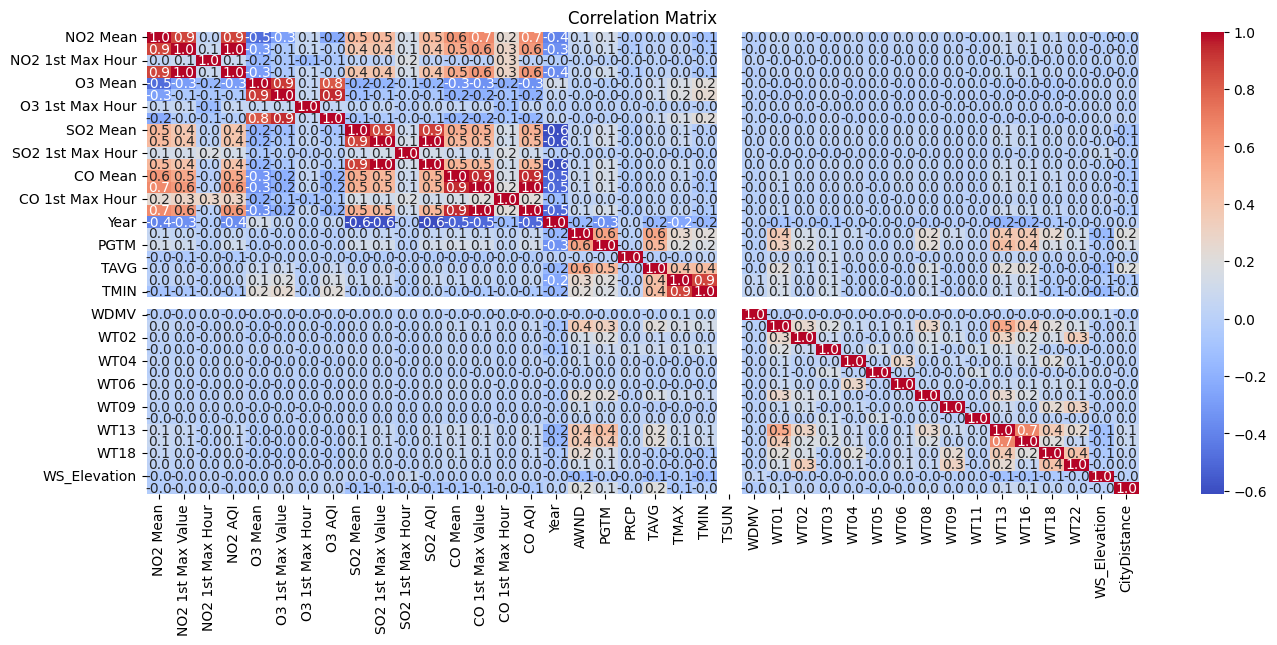

In [14]:
# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

plt.title('Correlation Matrix')
plt.show()


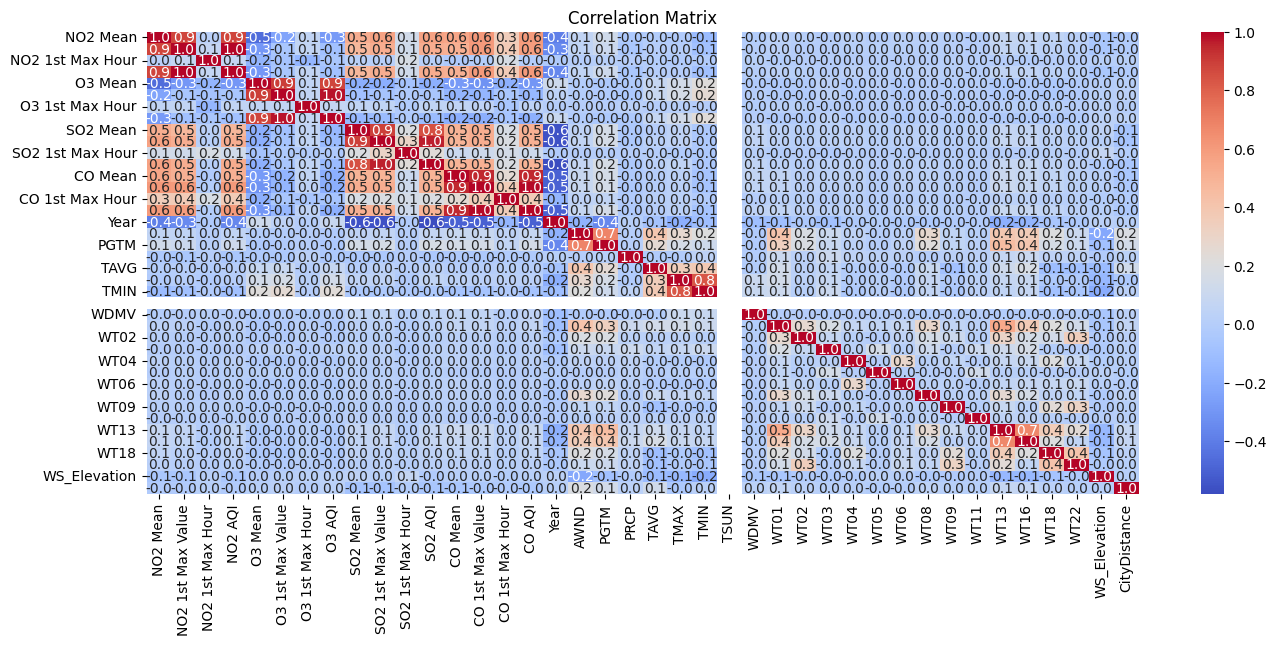

In [15]:
# Use scikit learn to apply transformations to the data to standardise the data and correct skewness
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# create a list of numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

# create a list of columns with skewness greater than 1
skewness = merged_data[numeric_columns].skew()
skewness = skewness[skewness > 1]
skewness

# apply power transformer to columns with skewness greater than 1
power_transformer = PowerTransformer()
merged_data[skewness.index] = power_transformer.fit_transform(merged_data[skewness.index])

# apply standard scaler to all numeric columns
scaler = StandardScaler()
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

# perform correlation matrix again
correlation_matrix2 = merged_data[numeric_columns].corr()
correlation_matrix2 = correlation_matrix2.round(2)
correlation_matrix2

# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()







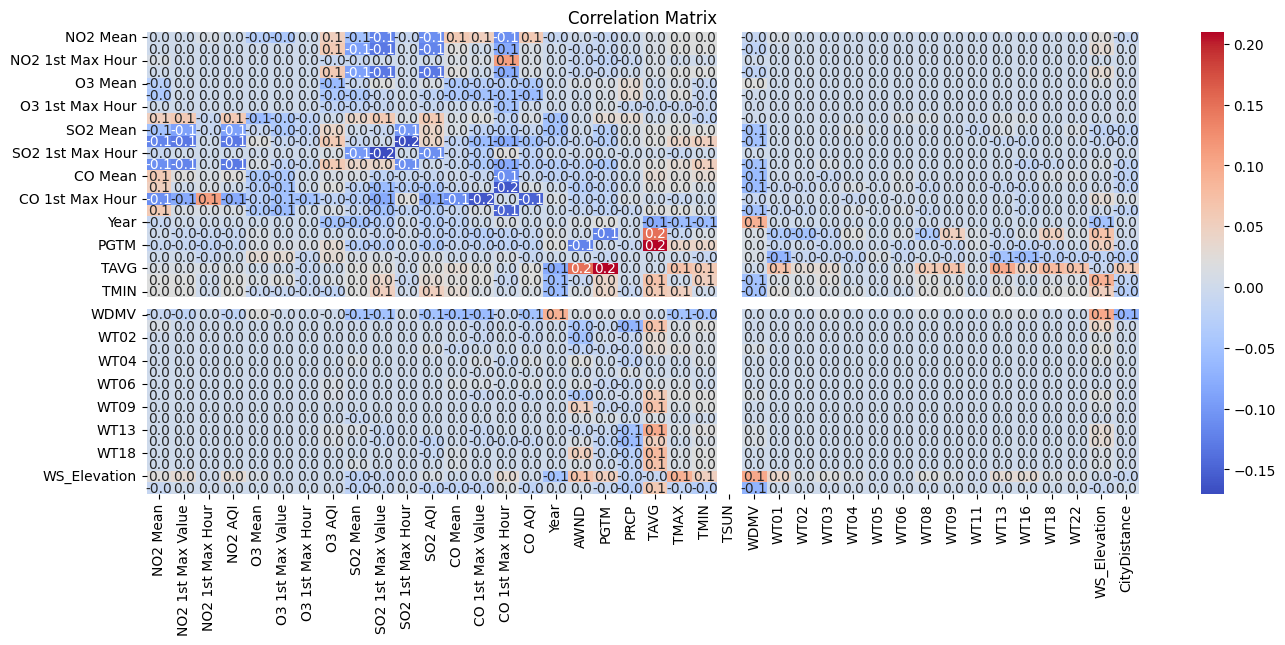

In [17]:
# minus correlation matrix from correlation matrix2
correlation_matrix_diff = correlation_matrix - correlation_matrix2
correlation_matrix_diff

# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix_diff, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Compare the correlation matrix before and after the transformations
# create a new column transformer
column_transformer = ColumnTransformer(transformers=[('power_transformer', PowerTransformer(), skewness.index), ('standard_scaler', StandardScaler(), numeric_columns)])

# create a new pipeline
pipeline = Pipeline(steps=[('column_transformer', column_transformer)])

# fit and transform the pipeline
merged_data_transformed = pipeline.fit_transform(merged_data)

# convert transformed data to a dataframe
merged_data_transformed = pd.DataFrame(merged_data_transformed, columns=numeric_columns)
# perform correlation matrix on transformed data

correlation_matrix_transformed = merged_data_transformed.corr()
correlation_matrix_transformed = correlation_matrix_transformed.round(2)
correlation_matrix_transformed



ValueError: Shape of passed values is (82438, 70), indices imply (82438, 40)

In [66]:
# preform a linear regression on the data to predict the pollution level
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# create a list of numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

# split data into features and target
X = merged_data[numeric_columns]
y = merged_data['NO2 AQI']

# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the target using the model
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

# save the model
import joblib

joblib.dump(model, 'Outputs/Linear_Regression_Model.pkl')

mse



2.57253080278133e-30

In [ ]:
# load the model
model = joblib.load('Outputs/Linear_Regression_Model.pkl')

# predict the target using the model
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

# create a dataframe of the coefficients
coefficients = pd.DataFrame(model.coef_, index=numeric_columns, columns=['Coefficient'])
coefficients

# create a dataframe of the intercept
intercept = pd.DataFrame([model.intercept_], index=['Intercept'], columns=['Value'])
intercept

# save the coefficients and intercept to csv
coefficients.to_csv('Outputs/Coefficients.csv')
intercept.to_csv('Outputs/Intercept.csv')